In [1]:
!pip install scikeras

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [3]:
!pip install scikit_learn

In [4]:
# Import libraries
# native libraries
import os
from time import time

# data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning libraries
import tensorflow as tf
from keras import Sequential
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Flatten, Dense, Dropout
from keras.layers import ReLU
from keras.initializers import GlorotUniform
from keras.utils import get_file



# regularizers
from keras.regularizers import l2, l1
from keras.constraints import max_norm

# required for compatibility between sklearn and keras
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# native python unit test library
from unittest import TestCase

%matplotlib inline

In [5]:
# Visible Testing
assert pd.__package__ == 'pandas'
assert GridSearchCV.__module__ == 'sklearn.model_selection._search'

Part 2. Simple Perceptron
For this task, you will build two neural networks using Keras. After you build these two models, compare the results of the model.

In [6]:
"""
Our Dataset
"""


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),
             dtype=int)

2a. Simple Perceptron
Construct a simple perceptron using Keras.

Make sure to include the following in your model:

Add 1 dense layer with a single neuron
Use a sigmoid activation function
Set epochs to 10
Use the version of crossentropy loss that is appropriate for this data.
Your model should be called model1.

The results of your fit model should be assigned to a variable called h1.

In [7]:
model1 = tf.keras.Sequential([
    Dense(1, input_dim=2, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4597 - loss: 1.0491
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4232 - loss: 1.0664
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4537 - loss: 1.0578
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4569 - loss: 1.0253  
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4334 - loss: 1.0541
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4759 - loss: 0.9749 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4502 - loss: 1.0174  
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4464 - loss: 1.0150 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4971 - loss: 0.9567 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4864 - loss: 0.9394 


In [8]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

2b. Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network).

Your neural network must have:

2 Hidden Layers
Select any number between 5-32 for the number of neurons in each hidden layers
Your pick of activation function and optimizer
Incorporate the myCallback function below into your model
Set epochs to 100
Your model should be called model2
Save the results of your fit statement to a variable called h2.
Use the version of crossentropy loss that is appropriate for this data.

In [9]:
#do not delete or modify
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # if model reaches 99% accuracy, training is terminated
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):
            self.model.stop_training = True
            self.model.callback_used = True

In [10]:
model2 = tf.keras.Sequential([
    Dense(30, input_dim=2, activation='sigmoid'),
    Dense(30, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h2 = model2.fit(X, y, epochs=100, batch_size=32, callbacks=[myCallback()])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5095 - loss: 0.7666
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5166 - loss: 0.7141 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4969 - loss: 0.7015 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5432 - loss: 0.6906 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5315 - loss: 0.6913
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5721 - loss: 0.6892
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5022 - loss: 0.6937  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5267 - loss: 0.6930
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5110 - loss: 0.6922 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5314 - loss: 0.6901
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5059 - loss: 0.6935  
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

In [11]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

2c. Analyze and Compare
Before you Start: You will need to install an additional library for this next segment.

Install the package mlxtend into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

pip install mlxtend
Or you can install this package using the following statement in your notebook

!pip install mlxtend
If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash.

The cells below generate decision boundary plots of your models (model1 & model2). Review the plots.

22500/22500 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


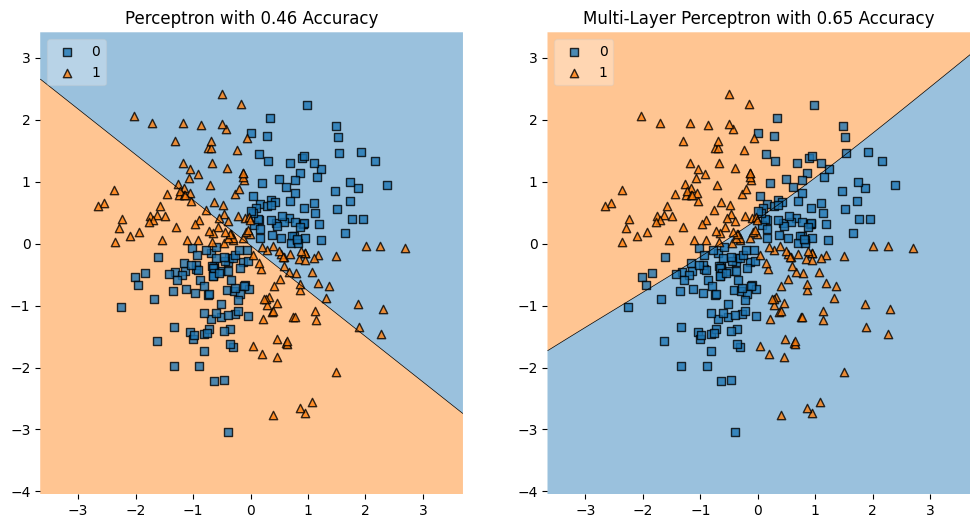

In [12]:
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Review
Why does the Perceptron (model1) only achieve about 50% accuracy?
A simple perceptron can only learn a linear decision boundary as seen in the visualization above. Since the data points are distributed in a way where only a single class is represented per quadrant, a linear decision boundary can never reach an accuracy much higher than about 50% since each class will be equally represented on either side of that linear decision boundary.

What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and Y?
The additional layers and neurons allow a neural networks to learn non-linear relationships between X and Y. Each layer in a neural net represents an N-dimensional vector space. So by passing data from one layer to another, we are passing a data vector from one vector space to another, each with a different dimensions, often times this will change the geometry of the data points (i.e. their distribution in space) in such a way where a linear separation then becomes possible. This is the same idea behind the Kernel Trick in Support Vector Machines (SVM).

3. Keras MMP
Implement a Multilayer Perceptron architecture of your choosing using the Keras library.
Train your model and report its baseline accuracy.
Then hyper-parameters tune two parameters each with no more than 2 values each
Due to limited computational resources on CodeGrade DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE
Report your optimized model's accuracy
Use the Heart Disease Dataset provided (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyper-parameters tune your model.
Use n_jobs = 1
When hyper-parameters tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [13]:
# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


In [14]:
# Create an input matrix named 'X' store it in a 2D numpy array
X = df.drop('target', axis=1).values

# Create an output vector for the labels named 'Y', store it in 1D numpy array
Y = df['target'].values


In [15]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [16]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
create_model = lambda: tf.keras.Sequential([
    Dense(30, input_dim=13, activation='sigmoid'),
    Dense(30, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [17]:
# Visible Testing
assert (create_model().__module__ == 'tensorflow.python.keras.engine.sequential') or (create_model().__module__ == 'keras.src.models.sequential'), "create_model should return a keras model that was created using the Sequential class."


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'

model = KerasClassifier(build_fn=create_model, batch_size=64, epochs=20)

In [19]:
# Visible Testing
assert model.__module__ == 'scikeras.wrappers' or model.__module__== 'keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [20]:
# Define the grid search parameters inside a dictionary named 'param_grid'
# Use 2 hyper-parameters with 2 possible values for each
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20]
}



In [21]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [22]:
# Create Grid Search object and name it 'gs'
# Run Grid Search
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  n_jobs=1,
                  verbose=0)

grid_result = gs.fit(X, Y)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# your grid_result object should be able to run in this code
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")